In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#importing libraries for some other models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

In [2]:
data = pd.read_excel(r"c:\Users\ASUS\Desktop\Dengue research\Data\upto_2019_2.xlsx")

In [3]:
data.columns

Index(['Yerar_week_No', 'week _No', 'Totals_each_week', 'total _rainfall',
       'day_time_average_relative_humidity', 'night_time_average_humidity',
       'Maximum_Temp', 'Minimum_Temp_of_the_week', 'average_rainfall',
       'average_temperature', 'No_of_rainy_days'],
      dtype='object')

In [4]:
data['log_total_dengue']=np.log10(data['Totals_each_week'])

In [5]:


data['dengue_lag_1'] = data['log_total_dengue'].shift(1)
data['dengue_lag_2'] = data['log_total_dengue'].shift(2)
data['dengue_lag_5'] = data['log_total_dengue'].shift(5)
data['dengue_lag_6'] = data['log_total_dengue'].shift(6)
data['dengue_lag_8'] = data['log_total_dengue'].shift(8)


data['No_of_rainy_days_5'] = data['No_of_rainy_days'].shift(5)
data['No_of_rainy_day_6'] = data['No_of_rainy_days'].shift(6)
data['No_of_rainy_day_9'] = data['No_of_rainy_days'].shift(9)


data['total _rainfall_7'] = data['total _rainfall'].shift(7)

data['day_humidity_10'] = data['day_time_average_relative_humidity'].shift(10)
data['day_humidity_11'] = data['day_time_average_relative_humidity'].shift(11)

data['night_time_average_humidity_lag_9'] = data['night_time_average_humidity'].shift(9)
data['night_time_average_humidity_lag_10'] = data['night_time_average_humidity'].shift(10)


data['Maximum_temp_lag_3'] = data['Maximum_Temp'].shift(3)
data['Maximum_temp_lag_4'] = data['Maximum_Temp'].shift(4)
data['Maximum_temp_lag_5'] = data['Maximum_Temp'].shift(5)
data['Maximum_temp_lag_7'] = data['Maximum_Temp'].shift(7)



In [6]:

data = data.dropna()

In [7]:
len(data)

249

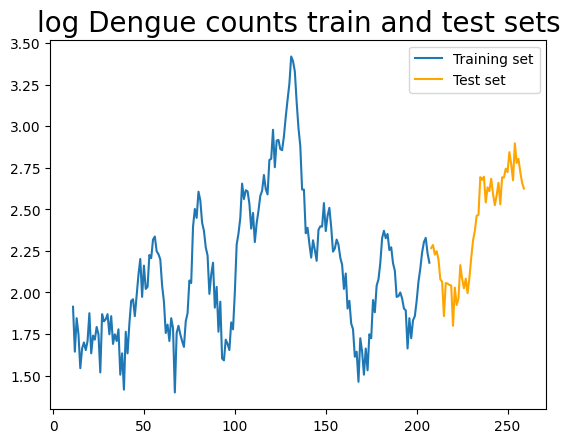

In [8]:
test_size = 52

df_train = data[:-test_size]
df_test = data[-test_size:]


plt.title('log Dengue counts train and test sets', size=20)
plt.plot(df_train['log_total_dengue'], label='Training set')
plt.plot(df_test['log_total_dengue'], label='Test set', color='orange')
plt.legend();


In [9]:
data.columns

Index(['Yerar_week_No', 'week _No', 'Totals_each_week', 'total _rainfall',
       'day_time_average_relative_humidity', 'night_time_average_humidity',
       'Maximum_Temp', 'Minimum_Temp_of_the_week', 'average_rainfall',
       'average_temperature', 'No_of_rainy_days', 'log_total_dengue',
       'dengue_lag_1', 'dengue_lag_2', 'dengue_lag_5', 'dengue_lag_6',
       'dengue_lag_8', 'No_of_rainy_days_5', 'No_of_rainy_day_6',
       'No_of_rainy_day_9', 'total _rainfall_7', 'day_humidity_10',
       'day_humidity_11', 'night_time_average_humidity_lag_9',
       'night_time_average_humidity_lag_10', 'Maximum_temp_lag_3',
       'Maximum_temp_lag_4', 'Maximum_temp_lag_5', 'Maximum_temp_lag_7'],
      dtype='object')

In [10]:
X_train = df_train.drop(['Yerar_week_No','week _No','Totals_each_week','total _rainfall','day_time_average_relative_humidity', 'night_time_average_humidity',
       'Maximum_Temp', 'Minimum_Temp_of_the_week', 'average_rainfall','Totals_each_week','log_total_dengue','average_temperature','No_of_rainy_days'], axis=1)
y_train = df_train['log_total_dengue']
X_test =  df_test.drop(['Yerar_week_No','week _No','Totals_each_week','total _rainfall','day_time_average_relative_humidity', 'night_time_average_humidity',
       'Maximum_Temp', 'Minimum_Temp_of_the_week', 'average_rainfall','Totals_each_week','log_total_dengue','average_temperature','No_of_rainy_days'], axis=1)
y_test = df_test['log_total_dengue']

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
X_train.columns

Index(['dengue_lag_1', 'dengue_lag_2', 'dengue_lag_5', 'dengue_lag_6',
       'dengue_lag_8', 'No_of_rainy_days_5', 'No_of_rainy_day_6',
       'No_of_rainy_day_9', 'total _rainfall_7', 'day_humidity_10',
       'day_humidity_11', 'night_time_average_humidity_lag_9',
       'night_time_average_humidity_lag_10', 'Maximum_temp_lag_3',
       'Maximum_temp_lag_4', 'Maximum_temp_lag_5', 'Maximum_temp_lag_7'],
      dtype='object')

In [13]:
def check(model, name='Default'):
    y_pred = model.predict(X_test_scaled)
    y_train_pred=model.predict(X_train_scaled)
    print(name, ":")
     # Number of independent variables in the model
    
    print('Mean Absolute percentage Error Test : ', metrics.mean_absolute_percentage_error(np.power(10,y_test), np.power(10,y_pred)))
  
    print('Mean Absolute percentage Error Train : ', metrics.mean_absolute_percentage_error(np.power(10,y_train), np.power(10,y_train_pred)))

    print('Test RMSE : ', np.sqrt(metrics.mean_squared_error(np.power(10,y_test), np.power(10,y_pred))))
    print('Train RMSE : ', np.sqrt(metrics.mean_absolute_error(np.power(10,y_test), np.power(10,y_pred))))
    print('R2 Score : ', metrics.r2_score(y_test, y_pred), end='\n\n')


    n = len(y_train)
    k = X_train.shape[1]
    r_squared = metrics.r2_score(y_test, y_pred)
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

    
    print('Adjusted R-squared: ', adjusted_r_squared)
    


In [14]:
# feature importance

def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    fi_df = fi_df[fi_df['feature_importance'] > 0.001]
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    
    
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [15]:
# Random forest
rf = RandomForestRegressor()
np.random.seed(1000)
%time rf.fit(X_train_scaled, y_train)

rf.score(X_test_scaled,y_test)

check(rf, "Random Forest Regressor")

Wall time: 222 ms
Random Forest Regressor :
Mean Absolute percentage Error Test :  0.24630153624358384
Mean Absolute percentage Error Train :  0.08646376981222652
Test RMSE :  132.46244140602255
Train RMSE :  9.423489598102579
R2 Score :  0.8105828401435511

Adjusted R-squared:  0.7925935009393074


In [16]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [15,50,75,100,200],
    'max_depth': [10, 20, 30],
    #'max_features': ['sqrt', 'log2'],
    'max_features': [4,8,12,16],
    'min_samples_split': [5,10,15],
    'min_samples_leaf' : [4,6,8,10,12],
    'bootstrap' : ['True','False']
    
}

# Create a grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'bootstrap': 'False', 'max_depth': 20, 'max_features': 16, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}
Best score:  0.7500546102934631


In [17]:
# Random forest
rf = RandomForestRegressor(bootstrap='False',max_depth=120,max_features=16,min_samples_leaf=6,min_samples_split=10, n_estimators=15)
np.random.seed(1000)
%time rf.fit(X_train_scaled, y_train)

rf.score(X_test_scaled,y_test)

check(rf, "Random Forest Regressor")

Wall time: 34.9 ms
Random Forest Regressor :
Mean Absolute percentage Error Test :  0.28253101705252415
Mean Absolute percentage Error Train :  0.164573358687457
Test RMSE :  184.70240718821077
Train RMSE :  10.369796018817647
R2 Score :  0.7742385533694063

Adjusted R-squared:  0.7527975221251599


In [18]:
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the dataframe in descending order of feature importances
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)

                               feature  importance
0                         dengue_lag_1    0.853996
1                         dengue_lag_2    0.097647
5                   No_of_rainy_days_5    0.010569
8                    total _rainfall_7    0.007819
6                    No_of_rainy_day_6    0.007613
9                      day_humidity_10    0.004279
3                         dengue_lag_6    0.003545
4                         dengue_lag_8    0.002773
10                     day_humidity_11    0.001936
16                  Maximum_temp_lag_7    0.001777
14                  Maximum_temp_lag_4    0.001764
2                         dengue_lag_5    0.001548
13                  Maximum_temp_lag_3    0.001233
11   night_time_average_humidity_lag_9    0.001052
12  night_time_average_humidity_lag_10    0.000969
7                    No_of_rainy_day_9    0.000749
15                  Maximum_temp_lag_5    0.000731


In [191]:
# Filter the dataframe to only include columns with feature importance greater than 0.0025
important_features = feature_importances[feature_importances['importance'] > 0.002]

# Print the important features
print(important_features)

                               feature  importance
0                         dengue_lag_1    0.167825
1                         dengue_lag_2    0.140343
2                         dengue_lag_3    0.092871
4                         dengue_lag_5    0.090381
3                         dengue_lag_4    0.090034
6                         dengue_lag_7    0.068981
5                         dengue_lag_6    0.045654
7                         dengue_lag_8    0.045485
10                   No_of_rainy_day_6    0.015970
8                         dengue_lag_9    0.014353
27                     day_humidity_10    0.013233
21                  average_rainfall_8    0.012250
25                      day_humidity_8    0.011910
11                   No_of_rainy_day_7    0.011446
14                  No_of_rainy_day_10    0.011428
30   night_time_average_humidity_lag_8    0.011411
12                   No_of_rainy_day_8    0.011226
13                   No_of_rainy_day_9    0.010554
28                     day_humi

In [192]:
# Random forest
rf = RandomForestRegressor()
np.random.seed(1000)
%time rf.fit(X_train_scaled, y_train)

rf.score(X_test_scaled,y_test)

check(rf, "Random Forest Regressor")

Wall time: 303 ms
Random Forest Regressor :
Mean Absolute percentage Error Test :  0.24434004419202932
Mean Absolute percentage Error Train :  0.08688856077001596
Test RMSE :  132.31429916814707
Train RMSE :  9.396647332333828
R2 Score :  0.8142970467151098

Adjusted R-squared:  0.7696343111149464


In [111]:
# Select the important features from X_train
X_train_imp = X_train.loc[:, important_features['feature']]

# Select the important features from X_test
X_test_imp = X_test.loc[:, important_features['feature']]

In [113]:
# Random forest
rf = RandomForestRegressor()
np.random.seed(1000)
%time rf.fit(X_train_imp, y_train)

rf.score(X_test_imp,y_test)

check(rf, "Random Forest Regressor")

Wall time: 182 ms


c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


ValueError: X has 38 features, but RandomForestRegressor is expecting 12 features as input.

In [54]:
y_pred = rf.predict(X_test)
y_train_pred=rf.predict(X_train)

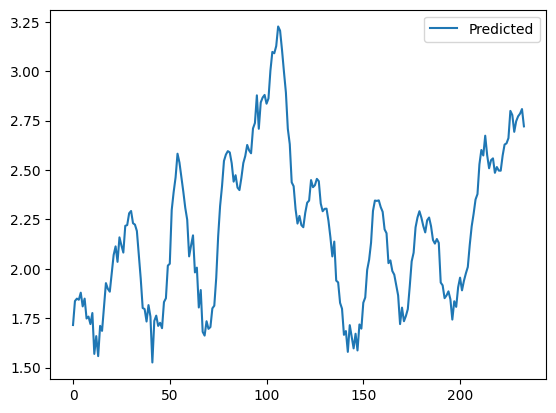

In [55]:
y_pred_all = np.concatenate((y_train_pred, y_pred))
# Plot the combined time series
plt.plot(y_pred_all, label='Predicted')
plt.legend()

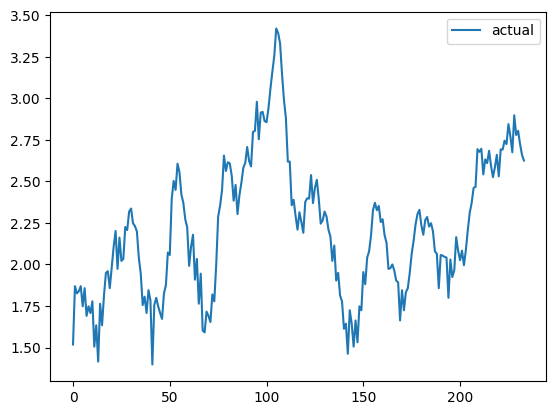

In [56]:
y_actual_all = np.concatenate((y_train, y_test))
# Plot the combined time series
plt.plot(y_actual_all, label='actual')
plt.legend()

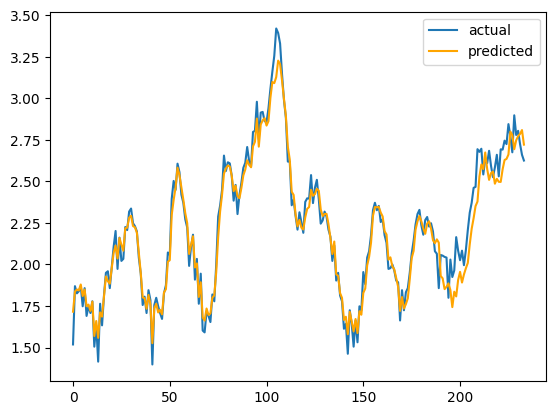

In [57]:
plt.plot(y_actual_all, label='actual')
plt.plot(y_pred_all, label='predicted', color='orange')
plt.legend();

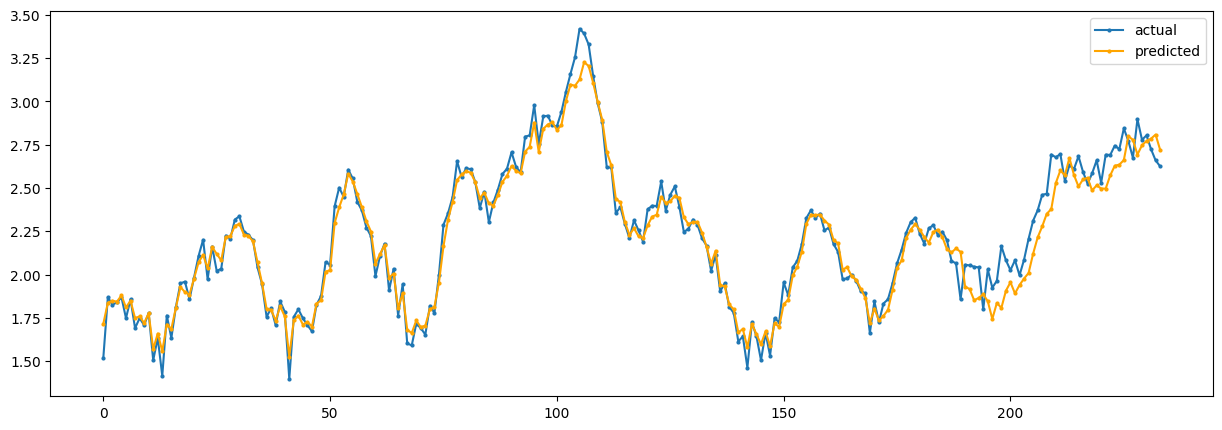

In [58]:
# assuming y_actual_all and y_pred_all are arrays with the actual and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_actual_all, 'o-', label='actual', markersize=2)
plt.plot(y_pred_all, 'o-', label='predicted', color='orange', markersize=2)
 # increase the distance between the points

plt.legend()
plt.show()

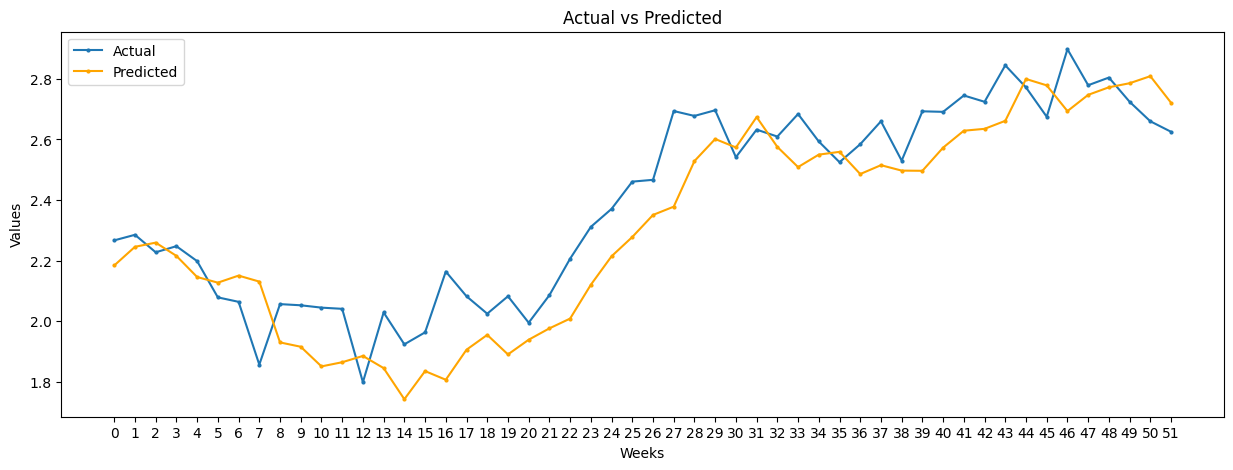

In [70]:
plt.figure(figsize=(15, 5))
plt.plot(y_actual_all[-52:], 'o-', label='Actual', markersize=2)
plt.plot(y_pred_all[-52:], 'o-', label='Predicted', color='orange', markersize=2)
plt.xticks(np.arange(0, 52, step=1))
plt.xlabel('Weeks')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

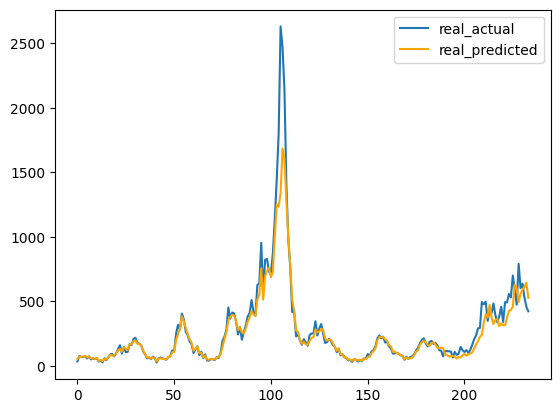

In [63]:
# plotting antilog values of actual vs predicted
a = np.power(10, y_actual_all)
b = np.power(10,y_pred_all)
plt.plot(a, label='real_actual')
plt.plot(b, label='real_predicted', color='orange')
plt.legend();

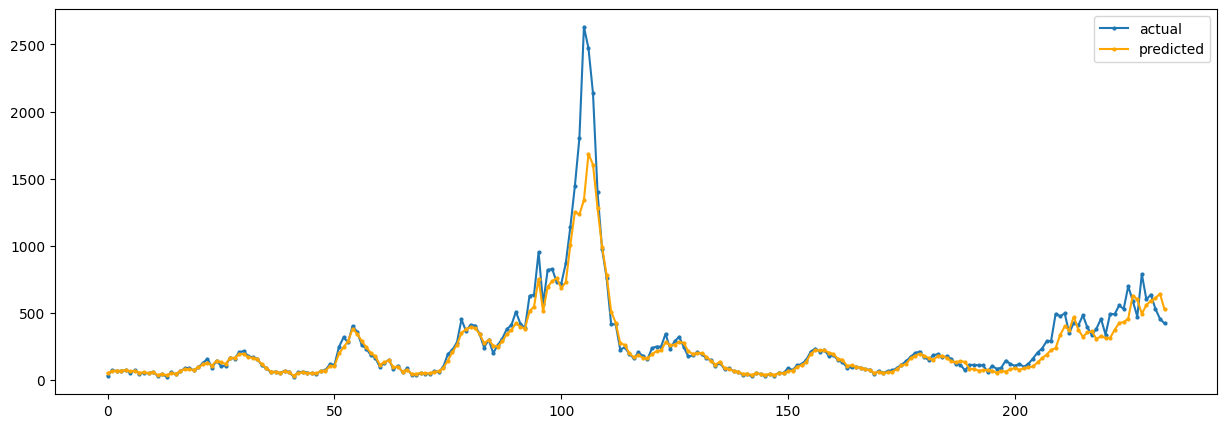

In [64]:
# assuming y_actual_all and y_pred_all are arrays with the actual and predicted values
plt.figure(figsize=(15,5))
plt.plot(a, 'o-', label='actual', markersize=2)
plt.plot(b, 'o-', label='predicted', color='orange', markersize=2)
 # increase the distance between the points

plt.legend()
plt.show()

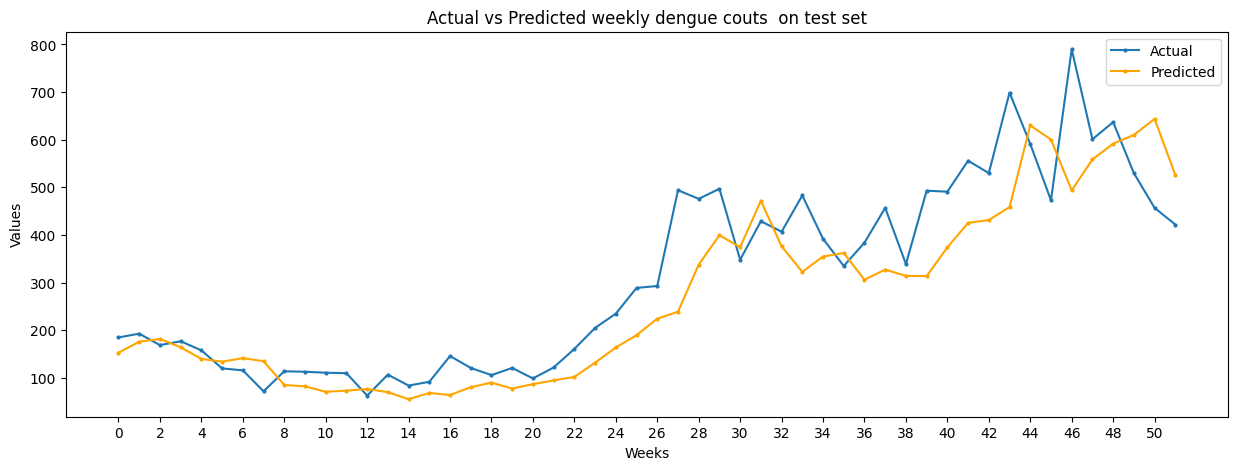

In [74]:
plt.figure(figsize=(15, 5))
plt.plot(a[-52:], 'o-', label='Actual', markersize=2)
plt.plot(b[-52:], 'o-', label='Predicted', color='orange', markersize=2)
plt.xticks(np.arange(0, 52, step=2))
plt.xlabel('Weeks')
plt.ylabel('Values')
plt.title('Actual vs Predicted weekly dengue couts  on test set')
plt.legend()
plt.show()

## Random forest feature importance>0.005

## Rolling Method for test set

In [123]:
# Predict the dengue count for each observation in the test set
n  = X_test.shape[0]
predicted_counts = []
for i in range(n):
    
    if i % 4 == 0: 
        X_current = X_test.iloc[i, :].values.reshape(1, -1)
        predicted_count = rf.predict(X_current)[0]
        predicted_counts.append(predicted_count)
    elif i % 4 == 1:
        X_current = X_test.iloc[i, :].values.reshape(1, -1)
        X_current[0, 0] = predicted_counts[-1]
        predicted_count = rf.predict(X_current)[0]
        predicted_counts.append(predicted_count)
    elif i % 4 == 2:
        X_current = X_test.iloc[i, :].values.reshape(1, -1)
        X_current[0, 0] = predicted_counts[-1]
        X_current[0, 1] = np.power(10,predicted_counts[-2])
        predicted_count = rf.predict(X_current)[0]
        predicted_counts.append(predicted_count)
    else:
        X_current = X_test.iloc[i, :].values.reshape(1, -1)
        X_current[0, 0] = predicted_counts[-1]
        X_current[0, 1] = np.power(10,predicted_counts[-2])
        X_current[0, 2] = np.power(10,predicted_counts[-3])
        predicted_count = rf.predict(X_current)[0]
        predicted_counts.append(predicted_count)

c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForest

In [124]:
print(predicted_counts)

[2.223885069160427, 2.1899063017603457, 2.205412500873085, 2.1947112128941715, 2.2433831365383834, 2.2274725579376438, 2.235577484525471, 2.2021127132108234, 1.83867916638427, 1.8205452694869035, 1.8064536174263146, 1.8147334038705591, 1.9788717772569653, 2.0262802561845685, 2.0370775644199073, 1.9617686560486394, 1.8642166947888814, 1.849709600369588, 1.7960445415154735, 1.6881748826466552, 1.9913736926753587, 1.9872531368025248, 2.1657437403609965, 2.192517681150229, 2.301331536381127, 2.2557298880000016, 2.2234903703117537, 2.1281230707892633, 2.5632181140809256, 2.556671032501511, 2.4882855879488175, 2.4442156491398337, 2.545725797319558, 2.4957884094997835, 2.4990809054172063, 2.4577895521991255, 2.478652855793921, 2.4980371287482894, 2.4970167905972596, 2.4428386365148858, 2.5484221994466387, 2.5170115168, 2.5018627359145875, 2.5148690314410875, 2.8662014314130864, 2.8892012629752286, 2.8426918235644876, 2.833551329544984, 2.8718254715415874, 2.883183544452861, 2.8867413778855786

In [125]:
from sklearn.metrics import r2_score

every_4th_y_test = y_test[::4]
every_4th_predicted_counts = predicted_counts[::4]
r2 = r2_score(every_4th_y_test, every_4th_predicted_counts)
print(r2)

0.8138742665547242


## Rolling method for train set

In [130]:
# Predict the dengue count for each observation in the train set
n  = X_train.shape[0]
predicted_counts = []
for i in range(n):
    
    if i % 4 == 0: 
        X_current = X_train.iloc[i, :].values.reshape(1, -1)
        predicted_count = rf.predict(X_current)[0]
        predicted_counts.append(predicted_count)
    elif i % 4 == 1:
        X_current = X_train.iloc[i, :].values.reshape(1, -1)
        X_current[0, 0] = predicted_counts[-1]
        predicted_count = rf.predict(X_current)[0]
        predicted_counts.append(predicted_count)
    elif i % 4 == 2:
        X_current = X_train.iloc[i, :].values.reshape(1, -1)
        X_current[0, 0] = predicted_counts[-1]
        X_current[0, 1] = np.power(10,predicted_counts[-2])
        predicted_count = rf.predict(X_current)[0]
        predicted_counts.append(predicted_count)
    else:
        X_current = X_train.iloc[i, :].values.reshape(1, -1)
        X_current[0, 0] = predicted_counts[-1]
        X_current[0, 1] = np.power(10,predicted_counts[-2])
        X_current[0, 2] = np.power(10,predicted_counts[-3])
        predicted_count = rf.predict(X_current)[0]
        predicted_counts.append(predicted_count)

c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
c:\users\asus\venv_vizua_1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForest

In [131]:
from sklearn.metrics import r2_score

every_4th_y_train = y_train[::4]
every_4th_predicted_counts = predicted_counts[::4]
r2 = r2_score(every_4th_y_train, every_4th_predicted_counts)
print(r2)

0.9897607499429907


### Other Machine learning models

In [19]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
check(knn, "knn")

knn :
Mean Absolute percentage Error Test :  0.45481886367028584
Mean Absolute percentage Error Train :  0.222656811138202
Test RMSE :  193.51873252860173
Train RMSE :  12.333361053445543
R2 Score :  0.09491152514758439

Adjusted R-squared:  0.008953401837578423


In [20]:
## Decision tree
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train_scaled,y_train)

check(dtree, "decision tree")

decision tree :
Mean Absolute percentage Error Test :  0.33137222518489623
Mean Absolute percentage Error Train :  0.0
Test RMSE :  161.621471345858
Train RMSE :  10.467899649735044
R2 Score :  0.6877086149432501

Adjusted R-squared:  0.6580496565859051


In [21]:
# Define a dictionary of hyperparameters and their values to search over
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(dtree, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [22]:
dtree = DecisionTreeRegressor(max_depth= 5, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 10,random_state=100)
dtree.fit(X_train_scaled,y_train)
check(dtree, "decision tree")

decision tree :
Mean Absolute percentage Error Test :  0.25838174421840715
Mean Absolute percentage Error Train :  0.15560982917325777
Test RMSE :  108.98441498626377
Train RMSE :  8.581494514468945
R2 Score :  0.7654674031869221

Adjusted R-squared:  0.7431933576795348


In [23]:
## Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso.fit(X_train_scaled,y_train)

check(lasso, "lasso")


lasso :
Mean Absolute percentage Error Test :  0.5096876900564326
Mean Absolute percentage Error Train :  0.8920512181922515
Test RMSE :  262.3608861907823
Train RMSE :  13.972327785590641
R2 Score :  -0.7267859548189828

Adjusted R-squared:  -0.8907823862822382


In [24]:
# XGB

import xgboost as xgb
xgb = xgb.XGBRegressor()
xgb.fit(X_train_scaled, y_train)
check(xgb, "xgb")

xgb :
Mean Absolute percentage Error Test :  0.2742451151893672
Mean Absolute percentage Error Train :  0.001321774946666323
Test RMSE :  140.1406517764484
Train RMSE :  9.669299651618944
R2 Score :  0.7886223380398366

Adjusted R-squared:  0.7685473645575864


In [25]:

# Define a dictionary of hyperparameters and their values to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [26]:

xgb = grid_search.fit(X_train_scaled, y_train)
check(xgb, "xgb")

xgb :
Mean Absolute percentage Error Test :  0.2341938434982233
Mean Absolute percentage Error Train :  0.12389051901690792
Test RMSE :  124.06046967829872
Train RMSE :  8.829209954763392
R2 Score :  0.8235239629580684

Adjusted R-squared:  0.8067636689373263


In [27]:
import xgboost as xgb

# Create an XGBoost regressor object with specified hyperparameters
xgb_reg = xgb.XGBRegressor(colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0)

# Fit the regressor to the training data
xgb_reg.fit(X_train_scaled, y_train)

# Check the performance of the regressor on the test data
check(xgb_reg, "xgb")

xgb :
Mean Absolute percentage Error Test :  0.2341938434982233
Mean Absolute percentage Error Train :  0.12389051901690792
Test RMSE :  124.06046967829872
Train RMSE :  8.829209954763392
R2 Score :  0.8235239629580684

Adjusted R-squared:  0.8067636689373263


### XGB feature imprtance

In [29]:

# Fit the XGBoost model
xgb_reg.fit(X_train_scaled, y_train)

# Get feature importances
importances = xgb_reg.feature_importances_

# Calculate total importance
total_importance = np.sum(importances)

# Calculate feature importance as a percentage
importance_pct = 100.0 * (importances / total_importance)


# Get the indices that would sort the importance array
indices = np.argsort(importances)[::-1]

# Print feature importance scores as a percentage
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f+1}. {X_train.columns[indices[f]]} ({importance_pct[indices[f]]}%)")

Feature ranking:
1. dengue_lag_1 (56.15985870361328%)
2. dengue_lag_2 (21.01532745361328%)
3. No_of_rainy_day_6 (3.397740364074707%)
4. dengue_lag_6 (2.6485610008239746%)
5. No_of_rainy_days_5 (2.4701390266418457%)
6. dengue_lag_5 (1.8338669538497925%)
7. day_humidity_11 (1.7830332517623901%)
8. Maximum_temp_lag_3 (1.4594662189483643%)
9. night_time_average_humidity_lag_9 (1.3485287427902222%)
10. total _rainfall_7 (1.1291431188583374%)
11. dengue_lag_8 (1.0716041326522827%)
12. No_of_rainy_day_9 (1.042231559753418%)
13. day_humidity_10 (1.0318130254745483%)
14. Maximum_temp_lag_7 (0.9880928993225098%)
15. night_time_average_humidity_lag_10 (0.9878087639808655%)
16. Maximum_temp_lag_5 (0.8332247138023376%)
17. Maximum_temp_lag_4 (0.7995572090148926%)
